# Project Name: Personalized Medicine Recommending System

### -Vaishnu Rewatkar

This Python program uses cosine similarity to recommend medicines based on a given input medicine. It calculates the similarity with other medicines, ranks them, and displays the top 5 similar medicines, excluding the input. This system assists in suggesting related medications for medical purposes.

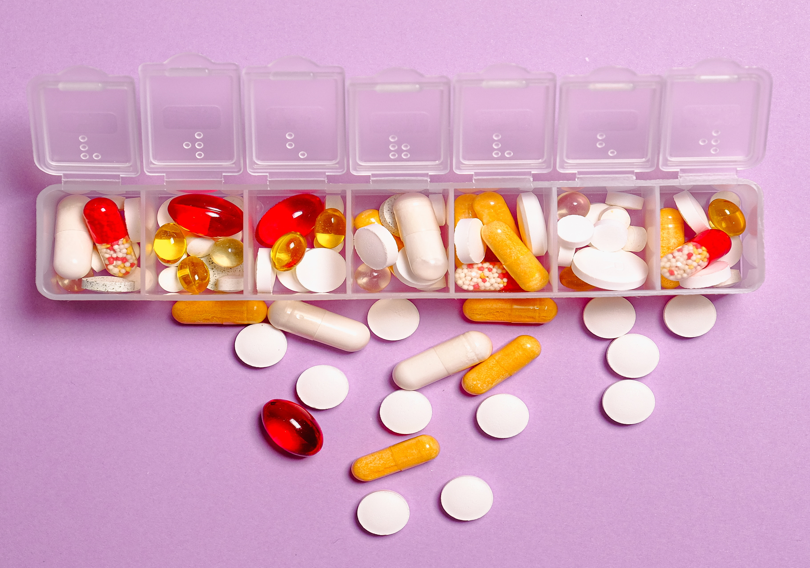

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image
Image(filename="C:\\Users\\sanjay rewatkar\\Downloads\\drug.png", width=900, height=10)

# Libraries

In [2]:
import numpy as np
import pandas as pd
import os
from warnings import filterwarnings
filterwarnings("ignore")

# Loading a datasets

In [3]:
display (os.getcwd())

'C:\\Users\\sanjay rewatkar\\Desktop\\codeclause'

In [4]:
os.chdir('C:\\Users\\sanjay rewatkar\\Desktop\\codeclause\\')
display (os.getcwd())

'C:\\Users\\sanjay rewatkar\\Desktop\\codeclause'

In [5]:
df =pd.read_csv("medicine.csv", header=0)
display (df)


,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...
...,...,...,...,...
9715,9716,T Muce Ointment 5gm,Wound,used for treating warts
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,Wound,used to soften the skin cells
9717,9718,Wokadine M Onit 10gm,Wound,used for scars
9718,9719,Wound Fix Solution 100ml,Wound,used for wounds


## Prepare the data

In [6]:
df.shape

(9720, 4)

### Data Pre-processing

In [7]:
df.isnull().sum()

index          0
Drug_Name      0
Reason         0
Description    0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

### Feature Extraction

In [10]:
df['Description']

0                           Mild to moderate acne (spots)
1       A RET 0.025% is a prescription medicine that i...
2       It is used to treat acne vulgaris in people 12...
3       It is used to treat acne vulgaris in people 12...
4       treat the most severe form of acne (nodular ac...
                              ...                        
9715                              used for treating warts
9716                        used to soften the skin cells
9717                                       used for scars
9718                                      used for wounds
9719    used to treat and remove raised warts (usually...
Name: Description, Length: 9720, dtype: object

In [11]:
df['Description'].apply(lambda x:x.split())

0                     [Mild, to, moderate, acne, (spots)]
1       [A, RET, 0.025%, is, a, prescription, medicine...
2       [It, is, used, to, treat, acne, vulgaris, in, ...
3       [It, is, used, to, treat, acne, vulgaris, in, ...
4       [treat, the, most, severe, form, of, acne, (no...
                              ...                        
9715                         [used, for, treating, warts]
9716                 [used, to, soften, the, skin, cells]
9717                                   [used, for, scars]
9718                                  [used, for, wounds]
9719    [used, to, treat, and, remove, raised, warts, ...
Name: Description, Length: 9720, dtype: object

In [12]:
df['Reason'] = df['Reason'].apply(lambda x:x.split())
df['Description'] = df['Description'].apply(lambda x:x.split())


In [13]:
df['Description'] = df['Description'].apply(lambda x:[i.replace(" ","") for i in x])

In [14]:
df['tags'] = df['Description'] + df['Reason'] 

In [15]:
new_df = df[['index','Drug_Name','tags']]

In [16]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...
9715,9716,T Muce Ointment 5gm,"[used, for, treating, warts, Wound]"
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,"[used, to, soften, the, skin, cells, Wound]"
9717,9718,Wokadine M Onit 10gm,"[used, for, scars, Wound]"
9718,9719,Wound Fix Solution 100ml,"[used, for, wounds, Wound]"


In [17]:
new_df['tags'].apply(lambda x:" ".join(x))

0                      Mild to moderate acne (spots) Acne
1       A RET 0.025% is a prescription medicine that i...
2       It is used to treat acne vulgaris in people 12...
3       It is used to treat acne vulgaris in people 12...
4       treat the most severe form of acne (nodular ac...
                              ...                        
9715                        used for treating warts Wound
9716                  used to soften the skin cells Wound
9717                                 used for scars Wound
9718                                used for wounds Wound
9719    used to treat and remove raised warts (usually...
Name: tags, Length: 9720, dtype: object

In [18]:
new_df


,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...
9715,9716,T Muce Ointment 5gm,"[used, for, treating, warts, Wound]"
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,"[used, to, soften, the, skin, cells, Wound]"
9717,9718,Wokadine M Onit 10gm,"[used, for, scars, Wound]"
9718,9719,Wound Fix Solution 100ml,"[used, for, wounds, Wound]"


In [19]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

In [20]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Mild to moderate acne (spots) Acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...
...,...,...,...
9715,9716,T Muce Ointment 5gm,used for treating warts Wound
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,used to soften the skin cells Wound
9717,9718,Wokadine M Onit 10gm,used for scars Wound
9718,9719,Wound Fix Solution 100ml,used for wounds Wound


In [21]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

In [22]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moderate acne (spots) acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...
...,...,...,...
9715,9716,T Muce Ointment 5gm,used for treating warts wound
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,used to soften the skin cells wound
9717,9718,Wokadine M Onit 10gm,used for scars wound
9718,9719,Wound Fix Solution 100ml,used for wounds wound


### Model Selection

In [23]:
import nltk

In [24]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=5000)

In [26]:
def stem(text):
  y = []

  for i in text.split():
    y.append(ps.stem(i))

  return " ".join(y) 

In [27]:
new_df['tags'] = new_df['tags'].apply(stem)

In [28]:
cv.fit_transform(new_df['tags']).toarray().shape

(9720, 806)

In [29]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [30]:
cv.get_feature_names_out()

array(['025', '12', '16', '18', 'abdomin', 'abl', 'ach', 'acid', 'acn',
       'acne', 'acquir', 'action', 'activ', 'acut', 'acute', 'adequ',
       'adhd', 'adjunct', 'adolesc', 'adult', 'adults', 'affect', 'ag',
       'age', 'aids', 'allerg', 'allergen', 'allergi', 'allow', 'alon',
       'alzheim', 'alzheimer', 'alzheimerâ', 'amoebiasi', 'anaemia',
       'anal', 'angina', 'angl', 'ani', 'ankylos', 'anorexia', 'anoth',
       'anti', 'antioxid', 'antipsychot', 'antiretrovir', 'anxieti',
       'anxiou', 'anxious', 'apnoea', 'appear', 'appetit', 'appetite',
       'appli', 'appropri', 'area', 'arrhythmia', 'arrhythmiasi',
       'arteri', 'arthralgia', 'arthriti', 'associ', 'atherothrombot',
       'athleteâ', 'atop', 'atrial', 'attack', 'awak', 'b1', 'b2', 'b3',
       'b5', 'b6', 'babi', 'backache', 'bacteri', 'bacteria', 'balanc',
       'balanitis', 'bandag', 'becom', 'behaviour', 'beliefs', 'benefit',
       'beta', 'biliari', 'biotin', 'bite', 'blackhead', 'blackheads',
      

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
cosine_similarity(vectors)

array([[1.        , 0.25197632, 0.43643578, ..., 0.        , 0.        ,
        0.        ],
       [0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
        0.0860663 ],
       [0.43643578, 0.25660012, 1.        , ..., 0.11111111, 0.0860663 ,
        0.0993808 ],
       ...,
       [0.        , 0.19245009, 0.11111111, ..., 1.        , 0.77459667,
        0.2981424 ],
       [0.        , 0.1490712 , 0.0860663 , ..., 0.77459667, 1.        ,
        0.34641016],
       [0.        , 0.0860663 , 0.0993808 , ..., 0.2981424 , 0.34641016,
        1.        ]])

In [33]:
similarity = cosine_similarity(vectors)

In [34]:
similarity[1]

array([0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
       0.0860663 ])

### Training the Model

In [35]:
def recommend(medicine):
    medicine_index = new_df[new_df['Drug_Name'] == medicine].index[0]
    distances = similarity[medicine_index]
    medicines_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in medicines_list:
        print(new_df.iloc[i[0]].Drug_Name)

In [36]:
recommend("Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S")

Oxypamol D Tablet 10'S
Pacimol MF Tablet 10'S
Painil Plus 100/500mg Tablet 10'S
Pamagin Plus Gel 30gm
Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S


In [37]:
import pickle

In [38]:
pickle.dump(new_df.to_dict(),open('medicine_dict.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))